# Project Title: Predict Survival of Tragic Voyage - Titanic

## Introduction

Some 100 years ago, a massive ship sank after it collided with an iceberg on the North Atlantic Ocean. About 2200 people were aboard the ship, sadly 1500 people perished in the ocean for its maiden voyage. Royal Mail Ship Titanic was the name given to this British luxury passenger liner. The ship which was known as iconic and unsinkable was the largest liner during that era, was constructed in Belfast, Ireland.

What contributed to the loss of so many lives? Reports cited the ship was travelling too fast, the iceberg warning was dismissed, a fatal wrong turn was made and there were not enough lifeboats. Could the tragedy have been prevented? If the lifeboat drill was not cancelled, more would survive. 

**Which variables contribute to higher survival rate?** That lead us into the focus of this topic, to predict the survival of Titanic.

## Project Goal

1. To explore and analyse who were the passengers onboard Titanic.
2. To predict the passenger survival using machine learning models.
3. Evaluate the best model which is suited for this project.

**ATTENTION**
In order to mount google drive, you need add shortcut to dataset/input into your drive first. Follow this instruction:
1. Go to *'Shared with me'>'Data Analytics'>'The Titanic'>datasets* 
2. Right click and pick 'Add shortcut to Drive'
3. Then just put in in 'My Drive'

In [69]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import VotingClassifier
from sklearn import svm
# import xgboost as xgb
# import lightgbm as lgb
# from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

In [29]:
train_url = 'https://raw.githubusercontent.com/gulstein86/data_analytics/master/group%20assignment/titanic/input/train.csv'
test_url = 'https://raw.githubusercontent.com/gulstein86/data_analytics/master/group%20assignment/titanic/input/test.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

## Understanding Data

Show the Dataset
Structure, variables, size of dataset, etc.

### Overview
First a broad overview. What are the types of data and their typical shape and content?

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Together with the PassengerId which is just a running index and the indication whether this passenger survived (1) or not (0) we have the following information for each person:

- *Pclass* is the Ticket-class: first (1), second (2), and third (3) class tickets were used. This is an ordinal integer feature. 

- *Name* is the name of the passenger. The names also contain titles and some persons might share the same surname; indicating family relations. We know that some titles can indicate a certain age group. For instance *Master* is a boy while *Mr* is a man. This feature is a character string of variable length but similar format.

- *Sex* is an indicator whether the passenger was female or male. This is a categorical text string feature. 

- *Age* is the integer age of the passenger. There are NaN values in this column.

- *SibSp* is another ordinal integer feature describing the number of siblings or spouses travelling with each passenger.

- *Parch* is another ordinal integer features that gives the number of parents or children travelling with each passenger.

- *Ticket* is a character string of variable length that gives the ticket number.

- *Fare* is a float feature showing how much each passenger paid for their rather memorable journey.

- *Cabin* gives the cabin number of each passenger. There are NaN in this column. This is another string feature.

- *Embarked* shows the port of embarkation as a categorical character value.

In summary we have 1 floating point feature (*Fare*), 1 integer variable (*Age*), 3 ordinal integer features (*Plcass, SibSp, Parch*), 2 categorical text features (*Sex, Embarked*), and 3 text string features (*Ticket, Cabin, Name*).

In [31]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The minimum/maxim values for pclass, age, sibsp, parch show us the range of these features. Also we see that there's quite a range in fares.

#### Missing Value

In [32]:
print(train.isnull().sum())
print('----'*10)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


- In the **training data** a large majority of *Cabin* numbers are missing, together with 177 *Age* values and 2 *Embarked* values. 

- Also, in the **test data** there is one *Fare* missing (cheeky selection), almost 100 *Age* values are unknown, and only 91 *Cabin* numbers were preserved. Best to keep that in mind.

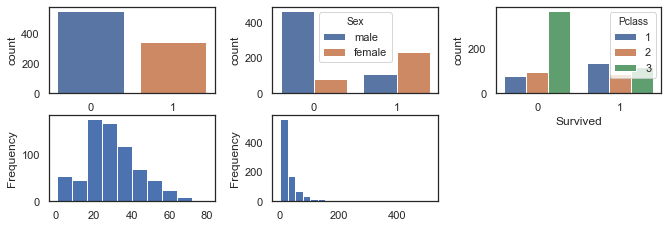

In [33]:
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.countplot(x="Survived", data=train)

plt.subplot(332)
sns.countplot(x="Survived", hue = 'Sex', data=train)

plt.subplot(333)
sns.countplot(x = "Survived", hue = "Pclass", data = train)

plt.subplot(334)
train['Age'].plot.hist()

plt.subplot(335)
train['Fare'].plot.hist(bins = 20, figsize = (10,5))
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

blah blah blah

## Data Pre-Processing & Data Cleaning

In [35]:
# Drop unnecessary columns, these columns won't be useful in analysis and prediction
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test = test.drop(['Name','Ticket','Cabin'], axis=1)

### Embarked

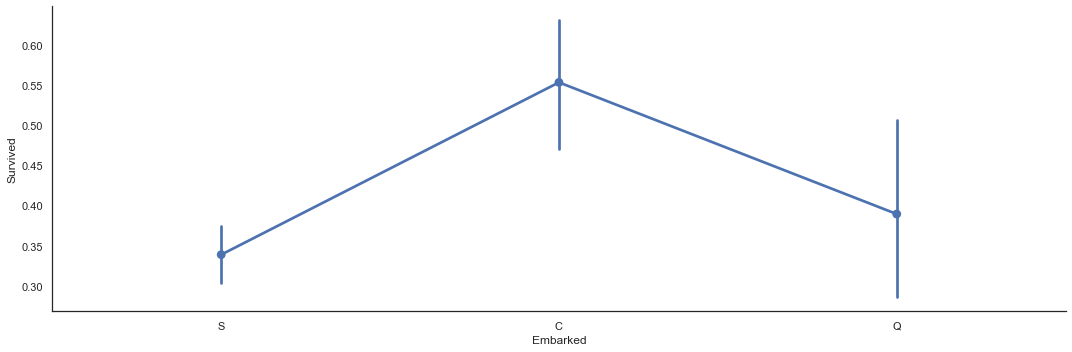

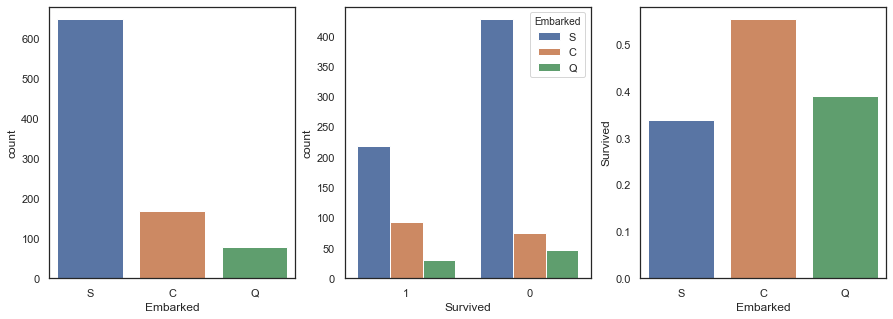

In [36]:
# Only in train dataset, fill the two missing values with the most occurred value, which is "S".
train["Embarked"] = train["Embarked"].fillna("S")
sns.factorplot('Embarked','Survived', data=train, size=5, aspect=3)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x='Embarked', data=train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=train, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [37]:
'''
Either to consider Embarked column in predictions, and remove "S" dummy variable, 
and leave "C" & "Q", since they seem to have a good rate for Survival.

OR, don't create dummy variables for Embarked column, just drop it, 
because logically, Embarked doesn't seem to be useful in prediction.
'''

embark_dummies_titanic_train  = pd.get_dummies(train['Embarked'])
embark_dummies_titanic_train.drop(['S'], axis=1, inplace=True)

embark_dummies_titanic_test  = pd.get_dummies(test['Embarked'])
embark_dummies_titanic_test.drop(['S'], axis=1, inplace=True)

In [38]:
train = train.join(embark_dummies_titanic_train)
test  = test.join(embark_dummies_titanic_test)

In [41]:
train.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

In [43]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0,3,male,22.0,1,0,7.2500,0,0
1,1,1,female,38.0,1,0,71.2833,1,0
2,1,3,female,26.0,0,0,7.9250,0,0
3,1,1,female,35.0,1,0,53.1000,0,0
4,0,3,male,35.0,0,0,8.0500,0,0


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,892,3,male,34.5,0,0,7.8292,0,1
1,893,3,female,47.0,1,0,7.0000,0,0
2,894,2,male,62.0,0,0,9.6875,0,1
3,895,3,male,27.0,0,0,8.6625,0,0
4,896,3,female,22.0,1,1,12.2875,0,0


### Fare

In [46]:
# Only for test, since there is a missing "Fare" values
test["Fare"].fillna(test["Fare"].median(), inplace=True)

In [47]:
# Convert from float to int
train['Fare'] = train['Fare'].astype(int)
test['Fare'] = test['Fare'].astype(int)

In [48]:
# Get fare for survived & didn't survive passengers 
fare_not_survived = train["Fare"][train["Survived"] == 0]
fare_survived     = train["Fare"][train["Survived"] == 1]

# Get average and std for fare of survived/not survived passengers
avg_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

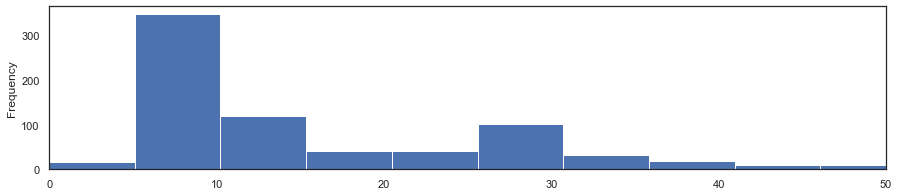

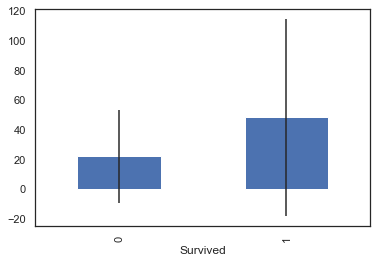

In [49]:
# plot
train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avg_fare.index.names = std_fare.index.names = ["Survived"]
avg_fare.plot(yerr=std_fare,kind='bar',legend=False)

### Age

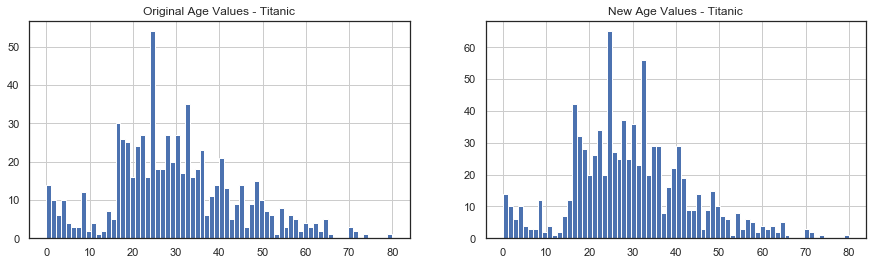

In [50]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age Values - Titanic')
axis2.set_title('New Age Values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# Get Average, STD, and Number of NaN values in train
avg_age_train = train["Age"].mean()
std_age_train = train["Age"].std()
count_nan_age_train = train["Age"].isnull().sum()

# Get Average, STD, and Number of NaN values in test
avg_age_test = test["Age"].mean()
std_age_test = test["Age"].std()
count_nan_age_test = test["Age"].isnull().sum()

# Generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(avg_age_train - std_age_train, avg_age_train + std_age_train, size = count_nan_age_train)
rand_2 = np.random.randint(avg_age_test - std_age_test, avg_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
train["Age"][np.isnan(train["Age"])] = rand_1
test["Age"][np.isnan(test["Age"])] = rand_2

# Convert from float to int
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)
        
# plot new Age Values
train['Age'].hist(bins=70, ax=axis2)
#test['Age'].hist(bins=70, ax=axis4)

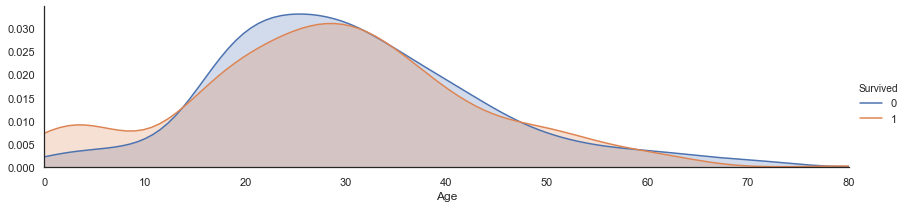

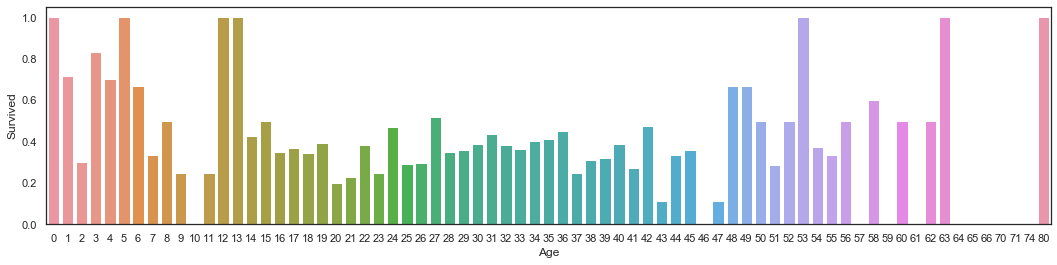

In [51]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
avg_age = train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=avg_age)

### Family

In [52]:
""" 
Instead of having two columns Parch & SibSp, We can have only one column represent 
if the passenger had any family member aboard or not,
Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
"""
# make changes with training dataset
train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

# make changes with test dataset
test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

In [53]:
# Now we will drop Parch & SibSp
train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)

[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

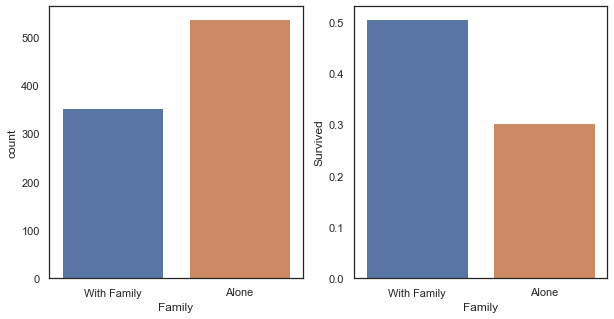

In [54]:
# Plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=train,kind='count',ax=axis1)
sns.countplot(x='Family', data=train, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = train[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

### Sex

In [55]:
# As we see, children(age < 16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child

def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
train['Person'] = train[['Age','Sex']].apply(get_person,axis=1)
test['Person'] = test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)

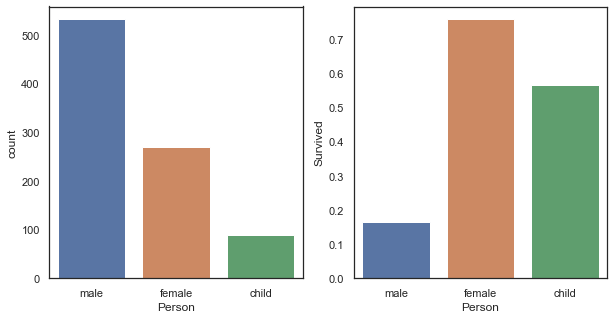

In [56]:
# Create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_train  = pd.get_dummies(train['Person'])
person_dummies_train.columns = ['Child','Female','Male']
person_dummies_train.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

train = train.join(person_dummies_train)
test = test.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=train,kind='count',ax=axis1)
sns.countplot(x='Person', data=train, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

In [57]:
train.drop(['Person'],axis=1,inplace=True)
test.drop(['Person'],axis=1,inplace=True)

### PClass

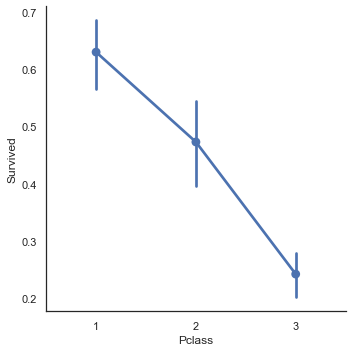

In [58]:
# sns.factorplot('Pclass',data=train,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=train, size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_train  = pd.get_dummies(train['Pclass'])
pclass_dummies_train.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_train.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

train = train.join(pclass_dummies_train)
test = test.join(pclass_dummies_test)

In [59]:
train.drop(['Pclass'],axis=1,inplace=True)
test.drop(['Pclass'],axis=1,inplace=True)

In [60]:
train.head()

,Survived,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
0,0,22,7,0,0,1,0,0,0,0
1,1,38,71,1,0,1,0,1,1,0
2,1,26,7,0,0,0,0,1,0,0
3,1,35,53,0,0,1,0,1,1,0
4,0,35,8,0,0,0,0,0,0,0


In [61]:
test.head()

,PassengerId,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
0,892,34,7,0,1,0,0,0,0,0
1,893,47,7,0,0,1,0,1,0,0
2,894,62,9,0,1,0,0,0,0,1
3,895,27,8,0,0,0,0,0,0,0
4,896,22,12,0,0,1,0,1,0,0


In [62]:
# Descriptive statistics for each column
train.describe()

,Survived,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.566779,31.785634,0.188552,0.086420,0.397306,0.101010,0.301908,0.242424,0.206510
std,0.486592,13.471517,49.703730,0.391372,0.281141,0.489615,0.301511,0.459343,0.428790,0.405028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,31.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,80.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
test.describe()

,PassengerId,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,29.971292,35.133971,0.244019,0.110048,0.394737,0.076555,0.332536,0.255981,0.222488
std,120.810458,13.142610,55.855855,0.430019,0.313324,0.489380,0.266203,0.471686,0.436934,0.416416
min,892.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,21.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,28.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1204.750000,37.000000,31.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1309.000000,76.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Engineering

We need to add..

## Data Modelling

Define training and testing datasets

In [64]:
X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId",axis=1).copy()

Training and Testing the Models

1. Logistic Regression
2. SVM (Support Vetor Machine)
3. Decision Tree
4. Random Forest

### Logistic Regression

In [65]:
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, Y_train)

acc_log

0.8125701459034792

### SVM (Support Vector Machine)

In [76]:
svc = svm.SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)

acc_svc

0.8473625140291807

### Decision Tree

### Random Forest

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train, Y_train)

acc_random_forest

0.9663299663299664